# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [4]:
# Montando uma bivariada para a variável 'sex'
df_tab = pd.crosstab(df['sex'], df['flag_doente'], margins= True, margins_name = 'Total')
df_tab.index = ['masculino', 'feminino', 'Total']
df_tab

flag_doente,0,1,Total
masculino,72,25,97
feminino,92,114,206
Total,164,139,303


In [5]:
# Incluíndo a quantidade média de doentes
df_tab.loc[df_tab.index[-1],'Média_de_Doentes'] = np.mean(df_tab[1][:2])
df_tab

flag_doente,0,1,Total,Média_de_Doentes
masculino,72,25,97,NaN
feminino,92,114,206,NaN
Total,164,139,303,69.5


In [6]:
# Calculando a chance de ser doente (Odds)
df_tab['chance'] = df_tab[1]/df_tab[0]
df_tab

flag_doente,0,1,Total,Média_de_Doentes,chance
masculino,72,25,97,NaN,0.347222
feminino,92,114,206,NaN,1.239130
Total,164,139,303,69.5,0.847561


In [7]:
# Logito (LOG(Odds))
df_tab['Logito'] = np.log(df_tab['chance'])
df_tab

flag_doente,0,1,Total,Média_de_Doentes,chance,Logito
masculino,72,25,97,NaN,0.347222,-1.057790
feminino,92,114,206,NaN,1.239130,0.214410
Total,164,139,303,69.5,0.847561,-0.165392


In [8]:
# Calculando a razão de chances de ser doente (Odds ratio), usando o total como referência
df_tab['RC_vs_Total'] = df_tab['chance']/df_tab.loc['Total','chance']
df_tab

flag_doente,0,1,Total,Média_de_Doentes,chance,Logito,RC_vs_Total
masculino,72,25,97,NaN,0.347222,-1.057790,0.409672
feminino,92,114,206,NaN,1.239130,0.214410,1.461996
Total,164,139,303,69.5,0.847561,-0.165392,1.000000


In [9]:
# LOG do Odds ratio (com o total como referência)
df_tab['WOE'] = np.log(df_tab['RC_vs_Total'])
df_tab

flag_doente,0,1,Total,Média_de_Doentes,chance,Logito,RC_vs_Total,WOE
masculino,72,25,97,NaN,0.347222,-1.057790,0.409672,-0.892398
feminino,92,114,206,NaN,1.239130,0.214410,1.461996,0.379802
Total,164,139,303,69.5,0.847561,-0.165392,1.000000,0.000000


In [10]:
df_tab.rename({0:'saudáveis',1:'doentes'}, axis=1, inplace=True)
df_tab

flag_doente,saudáveis,doentes,Total,Média_de_Doentes,chance,Logito,RC_vs_Total,WOE
masculino,72,25,97,NaN,0.347222,-1.057790,0.409672,-0.892398
feminino,92,114,206,NaN,1.239130,0.214410,1.461996,0.379802
Total,164,139,303,69.5,0.847561,-0.165392,1.000000,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [17]:
df['age'].min()

29.0

In [18]:
df['age'].max()

77.0

In [19]:
intervalos = [28, 38, 48, 58, 67, 77]
faixas = ['28 - 38', '38 - 48', '48 - 58', '58 - 67', '67 - 77']
df['age_cat'] = pd.cut(df['age'], bins = intervalos, labels = faixas)

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,age_cat
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,58 - 67
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,58 - 67
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,58 - 67
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,28 - 38
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,38 - 48


In [23]:
# Montando uma bivariada para a variável 'age_cat'
df_tab_age = pd.crosstab(df['age_cat'], df['flag_doente'], margins= True, margins_name = 'Total')
df_tab_age

flag_doente,0,1,Total
age_cat,,,
28 - 38,8,3,11
38 - 48,50,21,71
48 - 58,63,53,116
58 - 67,33,55,88
67 - 77,10,7,17
Total,164,139,303


In [24]:
# Incluíndo a quantidade média de doentes
df_tab_age.loc[df_tab_age.index[-1],'Média_de_Doentes'] = np.mean(df_tab_age[1][:5])
df_tab_age

flag_doente,0,1,Total,Média_de_Doentes
age_cat,,,,
28 - 38,8,3,11,NaN
38 - 48,50,21,71,NaN
48 - 58,63,53,116,NaN
58 - 67,33,55,88,NaN
67 - 77,10,7,17,NaN
Total,164,139,303,27.8


In [25]:
# Calculando a chance de ser doente (Odds)
df_tab_age['chance'] = df_tab_age[1]/df_tab_age[0]
df_tab_age

flag_doente,0,1,Total,Média_de_Doentes,chance
age_cat,,,,,
28 - 38,8,3,11,NaN,0.375000
38 - 48,50,21,71,NaN,0.420000
48 - 58,63,53,116,NaN,0.841270
58 - 67,33,55,88,NaN,1.666667
67 - 77,10,7,17,NaN,0.700000
Total,164,139,303,27.8,0.847561


In [26]:
# Logito (LOG(Odds))
df_tab_age['Logito'] = np.log(df_tab_age['chance'])
df_tab_age

flag_doente,0,1,Total,Média_de_Doentes,chance,Logito
age_cat,,,,,,
28 - 38,8,3,11,NaN,0.375000,-0.980829
38 - 48,50,21,71,NaN,0.420000,-0.867501
48 - 58,63,53,116,NaN,0.841270,-0.172843
58 - 67,33,55,88,NaN,1.666667,0.510826
67 - 77,10,7,17,NaN,0.700000,-0.356675
Total,164,139,303,27.8,0.847561,-0.165392


In [27]:
# Calculando a razão de chances de ser doente (Odds ratio), usando o total como referência
df_tab_age['RC_vs_Total'] = df_tab_age['chance']/df_tab_age.loc['Total','chance']
df_tab_age

flag_doente,0,1,Total,Média_de_Doentes,chance,Logito,RC_vs_Total
age_cat,,,,,,,
28 - 38,8,3,11,NaN,0.375000,-0.980829,0.442446
38 - 48,50,21,71,NaN,0.420000,-0.867501,0.495540
48 - 58,63,53,116,NaN,0.841270,-0.172843,0.992577
58 - 67,33,55,88,NaN,1.666667,0.510826,1.966427
67 - 77,10,7,17,NaN,0.700000,-0.356675,0.825899
Total,164,139,303,27.8,0.847561,-0.165392,1.000000


In [28]:
# LOG do Odds ratio (com o total como referência)
df_tab_age['WOE'] = np.log(df_tab_age['RC_vs_Total'])
df_tab_age

flag_doente,0,1,Total,Média_de_Doentes,chance,Logito,RC_vs_Total,WOE
age_cat,,,,,,,,
28 - 38,8,3,11,NaN,0.375000,-0.980829,0.442446,-0.815437
38 - 48,50,21,71,NaN,0.420000,-0.867501,0.495540,-0.702108
48 - 58,63,53,116,NaN,0.841270,-0.172843,0.992577,-0.007450
58 - 67,33,55,88,NaN,1.666667,0.510826,1.966427,0.676218
67 - 77,10,7,17,NaN,0.700000,-0.356675,0.825899,-0.191282
Total,164,139,303,27.8,0.847561,-0.165392,1.000000,0.000000


In [29]:
df_tab_age.rename({0:'saudáveis',1:'doentes'}, axis=1, inplace=True)
df_tab_age

flag_doente,saudáveis,doentes,Total,Média_de_Doentes,chance,Logito,RC_vs_Total,WOE
age_cat,,,,,,,,
28 - 38,8,3,11,NaN,0.375000,-0.980829,0.442446,-0.815437
38 - 48,50,21,71,NaN,0.420000,-0.867501,0.495540,-0.702108
48 - 58,63,53,116,NaN,0.841270,-0.172843,0.992577,-0.007450
58 - 67,33,55,88,NaN,1.666667,0.510826,1.966427,0.676218
67 - 77,10,7,17,NaN,0.700000,-0.356675,0.825899,-0.191282
Total,164,139,303,27.8,0.847561,-0.165392,1.000000,0.000000


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

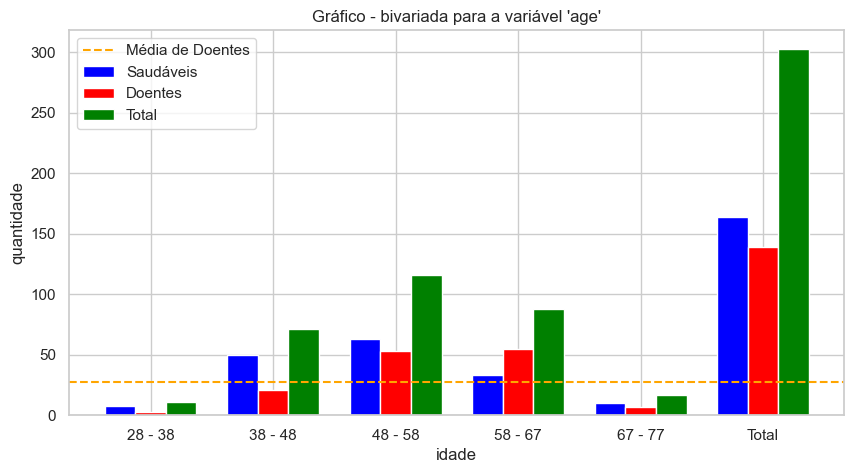

In [60]:
# Plotando um gráfico de barras
faixa = df_tab_age.index
plt.figure(figsize=(10,5))
r1 = np.arange(len(df_tab_age.saudáveis))
r2 = [x + 0.25 for x in r1]
r3 = [x + 0.25 for x in r2]
plt.bar(r1, df_tab_age.saudáveis, color='blue', width=0.25, label='Saudáveis')
plt.bar(r2, df_tab_age.doentes, color='red', width=0.25, label='Doentes')
plt.bar(r3, df_tab_age.Total, color='green', width=0.25, label='Total')
plt.axhline(np.mean(df_tab_age['doentes'][:5]), color = 'orange', linestyle='dashed', label='Média de Doentes')
plt.xlabel('idade')
plt.xticks([r+0.25 for r in range(len(df_tab_age.saudáveis))], faixa)
plt.ylabel('quantidade')
plt.title("Gráfico - bivariada para a variável 'age'")
plt.legend()